In [16]:
import pandas as pd
import numpy as np

In [17]:
df = pd.read_csv(r'C:\Users\patil\OneDrive\Desktop\Academic_performance.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [18]:
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

#Even though null values aren’t present, you should still check for inconsistencies in:

#Data types

#Duplicates

#Unusual values in categorical features

In [19]:
df.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [20]:
df.duplicated().sum()

np.int64(2)

In [21]:
df.drop_duplicates()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [22]:
print(df['gender'].unique())

['M' 'F']


In [23]:
df['gender'] = df['gender'].str.lower()

In [24]:
print(df['gender'].unique())

['m' 'f']


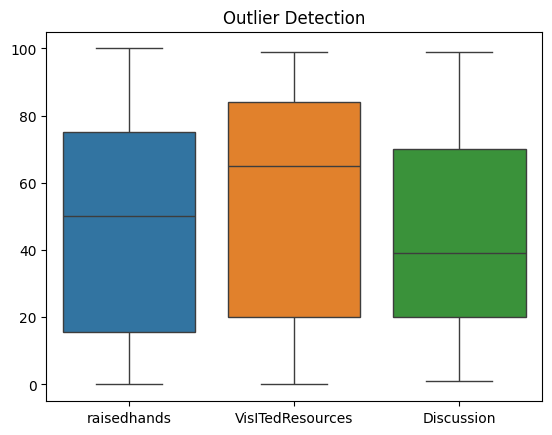

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(df[['raisedhands', 'VisITedResources', 'Discussion']])
plt.title("Outlier Detection")
plt.show()

In [29]:
def detect_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return column[(column < lower) | (column > upper)]

outliers_raisedhands = detect_outliers_iqr(df['raisedhands'])
print("Outliers in raisedhands:", outliers_raisedhands)

Outliers in raisedhands: Series([], Name: raisedhands, dtype: int64)


In [33]:
def Winsorize_Series(column):
    Q1 = column.quatile(0.25)
    Q3 = column.quatile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return column.clip(lower, upper)

    df['raisedhands'] = Winsorize_Series(df['raisedhands'])

print("Outliers in raisedhands:", outliers_raisedhands)

Outliers in raisedhands: Series([], Name: raisedhands, dtype: int64)


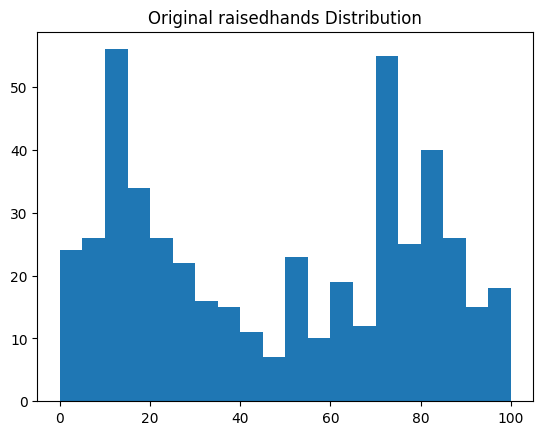

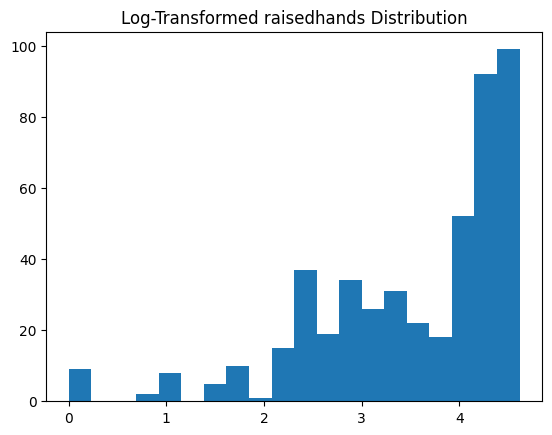

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Original distribution
plt.hist(df['raisedhands'], bins=20)
plt.title("Original raisedhands Distribution")
plt.show()

# Apply log transformation
df['raisedhands_log'] = np.log1p(df['raisedhands'])  # log1p = log(x + 1)

# Transformed distribution
plt.hist(df['raisedhands_log'], bins=20)
plt.title("Log-Transformed raisedhands Distribution")
plt.show()
